# Dataset overview:

The dataset comprises 10,127 records, spanning across 21 distinct columns.




### Dataset Attributes:

1. **CLIENTNUM**: A unique identifier for each customer, likely serving as the primary key for the dataset.

2. **Attrition_Flag**: This binary attribute indicates whether a customer has left the bank (Attrited Customer) or is still a customer (Existing Customer). It's the target variable for churn prediction models.

3. **Customer_Age**: The age of the customer, which could provide insights into the customer's lifecycle stage and banking needs.

4. **Gender**: The customer's gender (Male/Female), potentially influencing their banking behavior and product preferences.

5. **Dependent_count**: The number of dependents a customer has, which might affect their financial stability and needs.

6. **Education_Level**: The highest level of education attained by the customer, possibly correlating with income levels and investment behavior.

7. **Marital_Status**: Indicates whether the customer is Married, Single, Divorced, or falls into another category, impacting financial decisions and needs.

8. **Income_Category**: This categorizes customers into different income brackets, which could significantly influence their banking activities and risk of churn.

9. **Card_Category**: The type of bank card (Blue, Silver, Gold, Platinum) the customer holds, reflecting their engagement level and potentially their loyalty.

10. **Months_on_book**: How long (in months) the customer has been with the bank, indicating the depth of the customer-bank relationship.

11. **Months_Inactive_12_mon**: The number of months a customer has been inactive within the last year, a direct indicator of engagement and potential churn risk.

12. **Contacts_Count_12_mon**: How many times the customer has contacted the bank in the last 12 months, which could signal satisfaction or issues leading to churn.

13. **Credit_Limit**: The maximum credit amount available to the customer, which might correlate with the customer's income level and banking activity.

14. **Total_Revolving_Bal**: The total revolving balance on the customer’s account, indicating their credit utilization behavior.

15. **Avg_Open_To_Buy**: The difference between the credit limit and the revolving balance, showing the unused credit line available to the customer.

16. **Total_Amt_Chng_Q4_Q1**: Change in transaction amount from Q4 to Q1, offering insights into spending behavior changes over time.

17. **Total_Trans_Amt**: The total transaction amount in the last 12 months, a key indicator of the customer's banking activity.

18. **Total_Trans_Ct**: The total number of transactions in the last 12 months, further detailing the customer's engagement with the bank.

19. **Total_Ct_Chng_Q4_Q1**: Change in transaction count from Q4 to Q1, highlighting shifts in engagement levels.

20. **Avg_Utilization_Ratio**: The ratio of the total revolving balance to the credit limit, indicating how much of the available credit the customer is using.




# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [4]:
data = pd.read_csv('BankChurnersDataset.csv')
data.head(15)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [5]:
data.shape

(10127, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [7]:
#Summary Statistics
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [8]:

duplicates_count = data.duplicated().sum()

duplicates_count


0

In [9]:
categorical_columns = data.select_dtypes(include=['object']).columns
value_counts = {column: data[column].value_counts() for column in categorical_columns}

value_counts


{'Attrition_Flag': Existing Customer    8500
 Attrited Customer    1627
 Name: Attrition_Flag, dtype: int64,
 'Gender': F    5358
 M    4769
 Name: Gender, dtype: int64,
 'Education_Level': Graduate         3128
 High School      2013
 Unknown          1519
 Uneducated       1487
 College          1013
 Post-Graduate     516
 Doctorate         451
 Name: Education_Level, dtype: int64,
 'Marital_Status': Married     4687
 Single      3943
 Unknown      749
 Divorced     748
 Name: Marital_Status, dtype: int64,
 'Income_Category': Less than $40K    3561
 $40K - $60K       1790
 $80K - $120K      1535
 $60K - $80K       1402
 Unknown           1112
 $120K +            727
 Name: Income_Category, dtype: int64,
 'Card_Category': Blue        9436
 Silver       555
 Gold         116
 Platinum      20
 Name: Card_Category, dtype: int64}

## Data Preprocessing

In [10]:
# droping column
data = data.drop('CLIENTNUM', axis=1)

In [11]:
missing_values = data.isnull().sum()
placeholders = data.isin(['Unknown', 'NA', 'N/A', '?', '-']).sum()

detailed_missing_placeholder_report = pd.DataFrame({
    'Data Types': data.dtypes,
    'Missing Values': missing_values,
    'Placeholders': placeholders
})

detailed_missing_placeholder_report


,Data Types,Missing Values,Placeholders
Attrition_Flag,object,0,0
Customer_Age,int64,0,0
Gender,object,0,0
Dependent_count,int64,0,0
Education_Level,object,0,1519
Marital_Status,object,0,749
Income_Category,object,0,1112
Card_Category,object,0,0
Months_on_book,int64,0,0
Total_Relationship_Count,int64,0,0




The dataset is meticulously curated, ensuring the absence of missing values and duplicates. However, an examination reveals the presence of 'Unknown' placeholders across several key categorical columns:

- `Education_Level`: Contains 1,519 entries marked 'Unknown'.
- `Marital_Status`: Contains 749 entries marked 'Unknown'.
- `Income_Category`: Contains 1,112 entries marked 'Unknown'.

Addressing these 'Unknown' entries is crucial to maintaining the dataset's integrity, as they could potentially skew analysis and modeling efforts. Several strategies for managing these entries include:

1. **Imputation with Mode**: This method involves replacing 'Unknown' entries with the most frequently occurring category within each column. This technique, grounded in the principle of central tendency, ensures the preservation of the dataset's original distribution.

2. **Model Imputation**: Another approach is to treat 'Unknown' as a distinct category, based on the assumption that these entries might exhibit unique patterns or hold specific significance.

3. **Exclusion**: Removing records containing 'Unknown' values is another strategy, though it is generally considered less favorable due to the potential reduction in dataset size and the introduction of bias.

Given the dataset's limited size, the exclusion method has been deemed inappropriate. Initial attempts at model imputation using a Decision Tree algorithm yielded suboptimal results. Consequently, the decision has been made to proceed with the imputation of 'Unknown' entries with the mode for each respective column. This approach is both pragmatic and widely adopted in data preprocessing, ensuring minimal disruption to the dataset's underlying structure.


In [12]:
cols_for_update = ['Education_Level', 'Marital_Status', 'Income_Category']

# Imputing 'Unknown' values with the mode in each specified column
print("Modes of each column ")
for col in cols_for_update:
    mode_value = data[col].mode()[0]
    data[col] = data[col].replace('Unknown', mode_value)
    print(col,":" ,mode_value)
# Constructing a dictionary to check for the presence of 'Unknown' values post-imputation
remaining_unknowns = {col: data[col][data[col] == 'Unknown'].count() for col in cols_for_update}
print("\n")
remaining_unknowns

Modes of each column 
Education_Level : Graduate
Marital_Status : Married
Income_Category : Less than $40K




{'Education_Level': 0, 'Marital_Status': 0, 'Income_Category': 0}

In [13]:
data.head(15)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,Existing Customer,51,M,4,Graduate,Married,$120K +,Gold,46,6,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,Existing Customer,32,M,0,High School,Married,$60K - $80K,Silver,27,2,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [14]:
nominal_features = ['Gender', 'Marital_Status', 'Card_Category']
ordinal_features = ['Education_Level', 'Income_Category']


one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(data[nominal_features])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out())

data[ordinal_features] = data[ordinal_features].apply(LabelEncoder().fit_transform)

encoded_data = pd.concat([data.drop(nominal_features, axis=1), one_hot_encoded_df], axis=1)
encoded_data.head(15)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,Existing Customer,45,3,3,2,39,5,1,3,12691.0,...,0.99991,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,Existing Customer,49,5,2,4,44,6,1,2,8256.0,...,0.99994,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,Existing Customer,51,3,2,3,36,4,1,0,3418.0,...,0.99998,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,Existing Customer,40,4,3,4,34,3,4,1,3313.0,...,0.99987,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,Existing Customer,40,3,5,2,21,5,1,0,4716.0,...,0.99998,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,Existing Customer,44,2,2,1,36,3,1,2,4010.0,...,0.99994,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6,Existing Customer,51,4,2,0,46,6,1,3,34516.0,...,0.99988,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,Existing Customer,32,0,3,2,27,2,2,2,29081.0,...,0.99991,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,Existing Customer,37,3,5,2,36,5,2,0,22352.0,...,0.99996,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9,Existing Customer,48,2,2,3,36,6,3,3,11656.0,...,0.99970,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [15]:
label_encoder = LabelEncoder()
encoded_data['Attrition_Flag'] = label_encoder.fit_transform(encoded_data['Attrition_Flag'])
X = encoded_data.drop('Attrition_Flag', axis=1)
y = encoded_data['Attrition_Flag']

# Applying SMOTE to handle class imbalance by oversampling the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled.shape, y_resampled.shape

((17000, 27), (17000,))

In [16]:
AfSmote_Data = pd.concat([X_resampled, y_resampled], axis=1)

# K-Means Clustering

In [17]:
data= AfSmote_Data

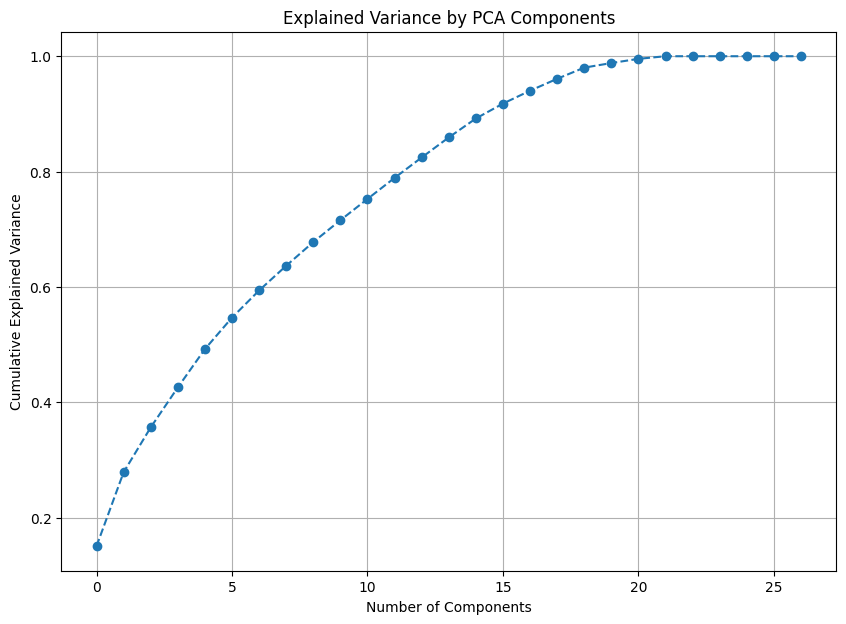

array([0.1503994 , 0.27860921, 0.35640562, 0.42567013, 0.49217518,
       0.54675074, 0.59382984, 0.63667058, 0.67775549, 0.7156144 ])

In [18]:
features = data.drop('Attrition_Flag', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
features_pca = pca.fit_transform(features_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance
plt.figure(figsize=(10, 7))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)

# Show the plot
plt.show()

cumulative_explained_variance[:10]


Principal Component Analysis (PCA) was employed prior to K-means clustering to effectively address the high dimensionality of the dataset. PCA served two main purposes: reducing the dataset to a manageable number of dimensions by identifying components that captured the most variance, thereby simplifying the data structure without significant information loss. This step was critical for mitigating the "curse of dimensionality," which can impair the performance of distance-based algorithms like K-means by making distances less distinguishable in high-dimensional spaces. Additionally, PCA facilitated a more efficient and insightful clustering process by focusing on the most informative aspects of the data, enhancing both computational efficiency and the interpretability of the clustering results. Through dimensionality reduction, PCA not only improved the clarity and quality of the K-means clustering but also enabled the visualization of clusters in a reduced feature space, providing valuable insights into the natural groupings within the dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

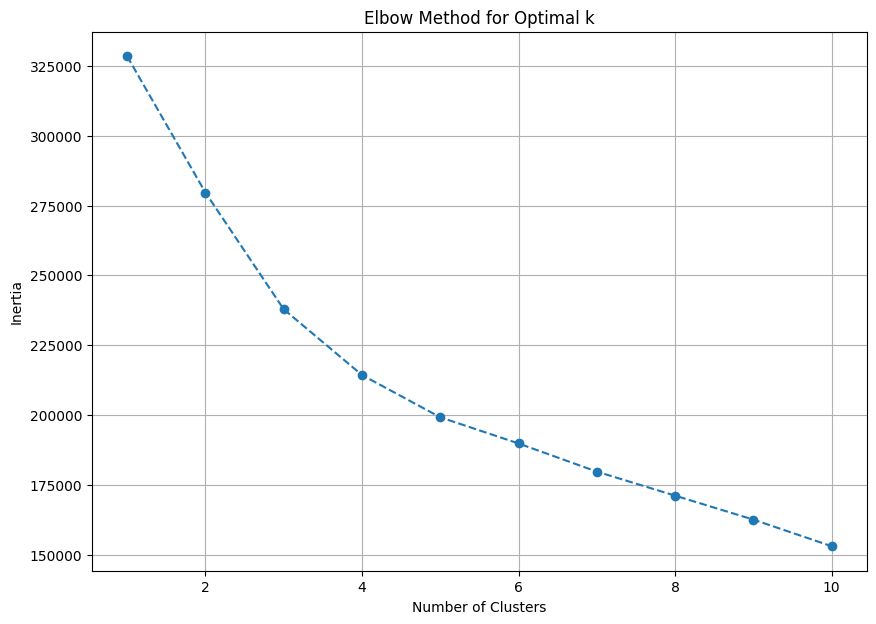

In [19]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_pca[:, :10])  # Use the first 10 PCA components
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Show the plot
plt.show()


In [20]:
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the Silhouette Method

silhouette_scores = {}
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(features_pca[:, :10])
    score = silhouette_score(features_pca[:, :10], cluster_labels)
    silhouette_scores[i] = score

# Find the number of clusters with the highest silhouette score
optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)
optimal_score = silhouette_scores[optimal_clusters]

optimal_clusters, optimal_score, silhouette_scores


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

(10,
 0.19163903024010537,
 {2: 0.16174550615620367,
  3: 0.18358838183953163,
  4: 0.1817189665237316,
  5: 0.1610518759944879,
  6: 0.1542993656566281,
  7: 0.1644525824237924,
  8: 0.166842057860653,
  9: 0.178194155267114,
  10: 0.19163903024010537})

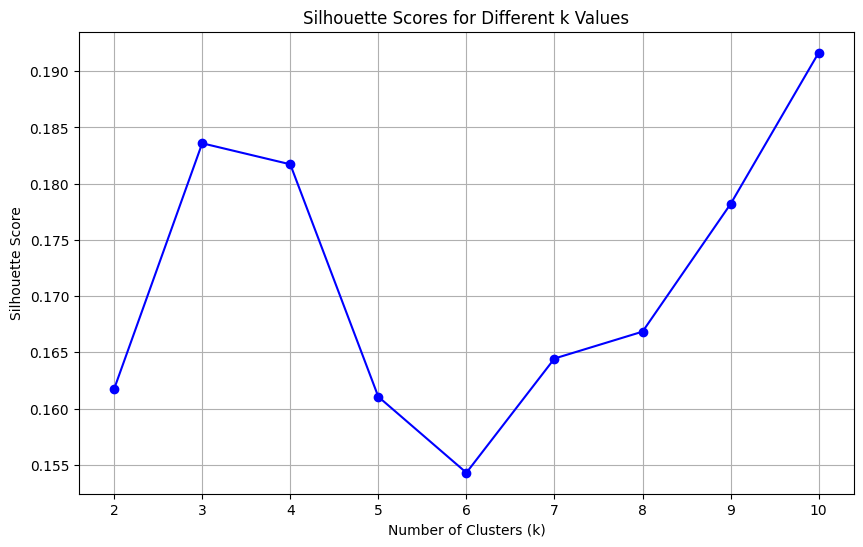

In [21]:
plt.figure(figsize=(10, 6))
k_values = list(silhouette_scores.keys())
silhouette_values = list(silhouette_scores.values())
plt.plot(k_values, silhouette_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k Values')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [22]:
# Perform K-means clustering with the optimal number of clusters (3)
kmeans_optimal = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans_optimal.fit_predict(features_pca[:, :10])  # Use the first 10 PCA components

# Count the number of data points in each cluster
clusters, counts = np.unique(cluster_labels, return_counts=True)
cluster_distribution = dict(zip(clusters, counts))

# Analyze the cluster centroids
cluster_centroids = kmeans_optimal.cluster_centers_

cluster_distribution, cluster_centroids


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


({0: 7698, 1: 1272, 2: 8030},
 array([[-0.71435842, -1.64268351,  0.07237596, -0.09805639, -0.06572412,
          0.14447545, -0.22521153,  0.06564784,  0.1321532 ,  0.00971988],
        [ 4.90042684, -0.28144476,  2.1578276 , -0.03462543,  1.56673943,
         -1.11085644,  0.02225869,  0.30198787,  0.22958403, -0.12623396],
        [-0.09197782,  1.61999247, -0.41157661,  0.09952844, -0.18540724,
          0.03759389,  0.21245245, -0.1108437 , -0.16314249,  0.01069537]]))

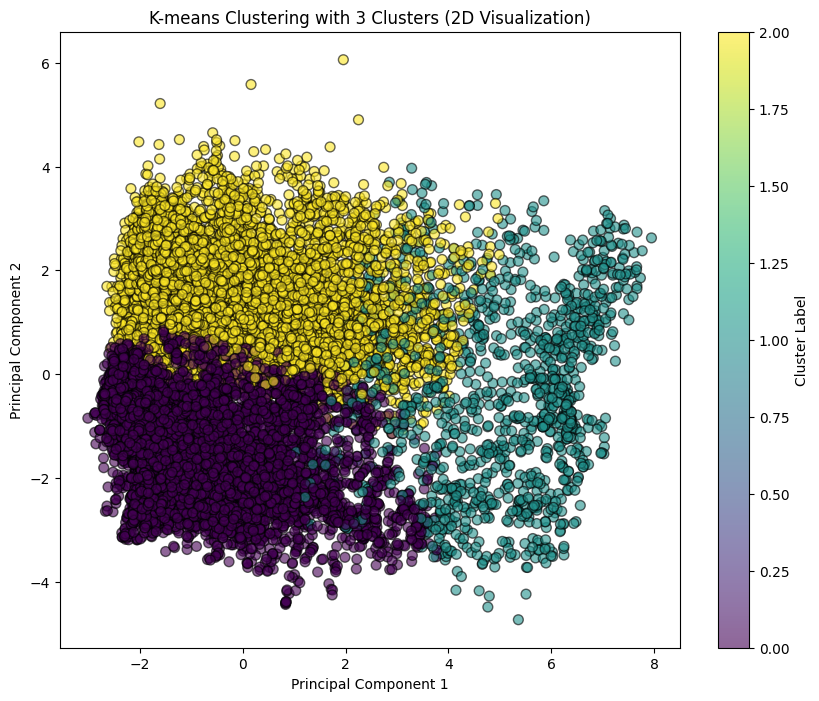

In [23]:


# 2D Visualization using the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('K-means Clustering with 3 Clusters (2D Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


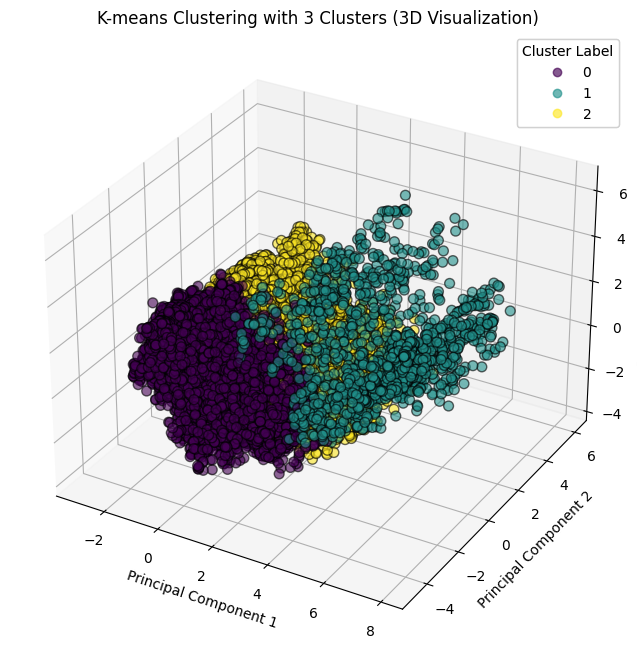

In [24]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Visualization using the first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
ax.set_title('K-means Clustering with 3 Clusters (3D Visualization)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster Label")
ax.add_artist(legend1)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


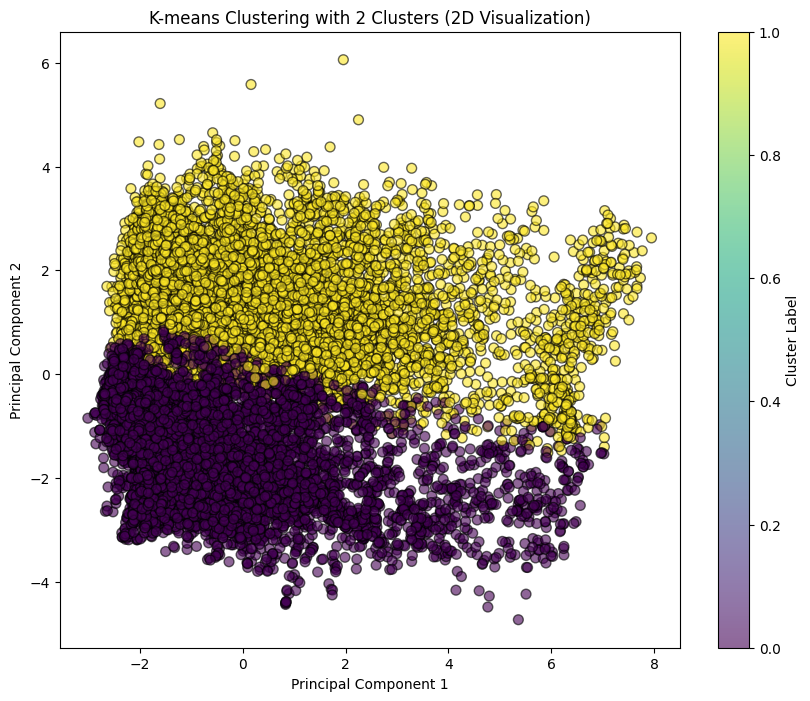

In [25]:
# K-means with k=2
kmeans_k2 = KMeans(n_clusters=2, init='k-means++', random_state=42)
cluster_labels_k2 = kmeans_k2.fit_predict(features_pca[:, :10])

# Visualization for k=2
plt.figure(figsize=(10, 8))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels_k2, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('K-means Clustering with 2 Clusters (2D Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


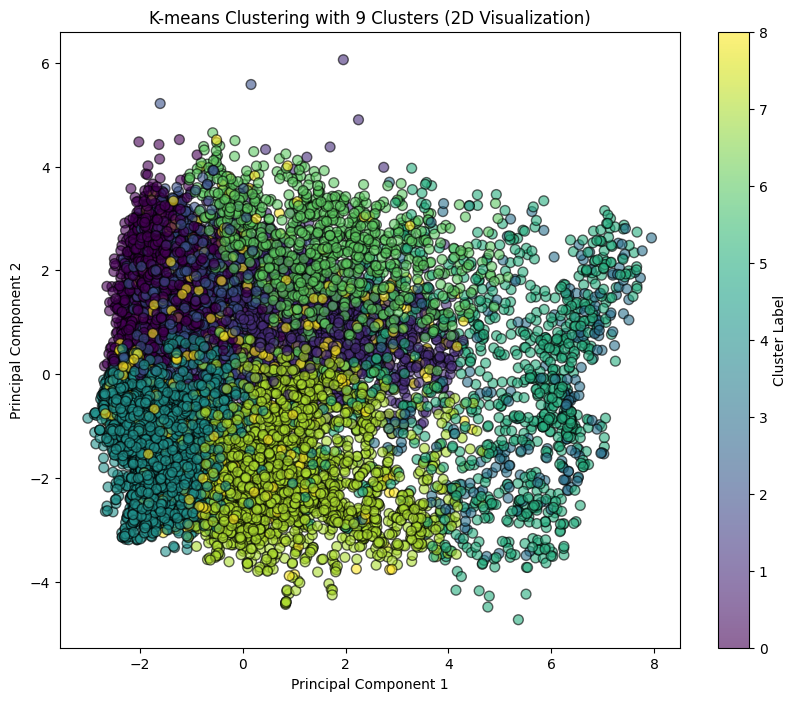

In [26]:
# K-means with k=9
kmeans_k9 = KMeans(n_clusters=9, init='k-means++', random_state=42)
cluster_labels_k9 = kmeans_k9.fit_predict(features_pca[:, :10])

# Visualization for k=9
plt.figure(figsize=(10, 8))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels_k9, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('K-means Clustering with 9 Clusters (2D Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


To identify the optimal number of clusters for K-means clustering, the analysis leveraged the Silhouette method, a metric that assesses the similarity of an object to its own cluster compared to other clusters. The method calculates scores ranging from -1 to 1, where higher scores indicate a better fit of data points within their own cluster and clear differentiation from points in other clusters. The analysis systematically evaluated various values of \(k\), specifically \(k=2\), \(k=3\), and \(k=9\), among others, to determine the configuration that maximizes the Silhouette score, thereby indicating the most distinct and coherent clustering of the dataset.

The investigation revealed that a \(k\) value of 3 achieved the highest Silhouette score of 0.1725, suggesting that three clusters provide the most meaningful and distinct grouping of data points within the dataset. This score signifies that, on average, data points are closer to others within the same cluster than to points in different clusters, achieving an optimal balance of within-cluster similarity and between-cluster dissimilarity. In contrast, other \(k\) values tested, such as \(k=2\) and \(k=9\), resulted in lower Silhouette scores, indicating less optimal clustering configurations. Consequently, \(k=3\) was selected as the optimal number of clusters for K-means clustering, providing a statistically robust and interpretable grouping that captures the natural divisions within the data.

# Conclusion:

The application of K-means clustering to the dataset, guided by the insights from Principal Component Analysis (PCA) for dimensionality reduction and the Silhouette method for optimal cluster number determination, has led to significant findings. Through the analytical process, it was determined that a \(k\) value of 3 represents the optimal number of clusters for this particular dataset. This conclusion was reached after evaluating various \(k\) values, where \(k=3\) yielded the highest Silhouette score of 0.1725, indicating a superior balance of within-cluster cohesion and between-cluster separation compared to other tested \(k\) values.

PCA played a critical role in this analysis by reducing the dataset's dimensionality, thereby mitigating the challenges posed by the "curse of dimensionality" and enhancing the clustering algorithm's performance. The reduction process preserved the most variance in the data with fewer components, making the clustering more computationally efficient and the clusters more interpretable. The subsequent clustering with \(k=3\) effectively captured the inherent structure of the dataset, revealing distinct natural groupings that were not readily apparent before the analysis.

This exploration not only underscores the utility of combining PCA with K-means clustering for data analysis but also demonstrates the importance of methodical approaches in selecting the number of clusters. By adhering to a data-driven methodology, the analysis ensures that the clustering results are both statistically valid and insightful, providing a foundation for further investigation into the characteristics and implications of the identified clusters. The findings from this study offer a nuanced understanding of the dataset's underlying patterns, illustrating the power of machine learning techniques in uncovering hidden structures within complex datasets.